In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
import json
# Your JSONL data
data = [
    {"original_comment": "Watching the market's ups and downs shows how quickly things can change. Strategic, informed trading isn't a choice; it's a must. Remember, caution is as crucial as ambition here. Stay alert, diversify, and let's ride this unpredictable market together. At the core is Eugenia Eiland, whose deep understanding of crypto and traditional trading is key. Her all-encompassing investment approach and staying updated on trends make her a valuable ally in this era.", "subreplies": ["I\u2019ve just looked up her full name on my browser and found her webpage without sweat, very much appreciate this", "Working with her has been a game-changer for my financial well-being. Her ability to simplify complex financial concepts and provide tailored solutions is commendable. Eugenia  \u2019s passion for her work shines through, making the financial planning process not only effective but also enjoyable.", "I'm sure the idea of an expert might sound generic or controversial to a few, but ever since getting help, I've been investing better for a while, and I couldn't be happier. Now I can see how broad and profitable the cryptocurrency market can be when you have the right proceedings.", "The process of trading can be complicated when you have limited knowledge. However, with the right strategy and setups, you can be successful. That's the whole point of investing."]},
    {"original_comment": "$80k every 4 weeks! I now have a good house and can now afford anything and also support my family", "subreplies": ["Huge, how did you achieve such biweekly returns? I'm a newbie and I've lost a lot of money investing on my own. Please how do I go about it, the year is almost coming to an end, how can I make profit?", "Hello, I am very interested. As you know, there are tons of investments out there and without solid knowledge, I can't decide what is best. Can you explain further how you invest and earn?", "As a beginner, it is essential that you have a mentor to help you stay accountable. In my case, Miss Luara Clarence has guided me for years and I highly recommend her. I focus on her. To be honest, I'm almost hesitant to let someone take charge of growing my finances, but I'm so glad I did.", "Wow Wow her too Miss Luara Clarence is a remarkable individual whom has brought immense positivity and inspiration into my life.", "The very first time we tried, we invested $2000 and after a week, we received $9500. That really helped us a lot to pay up our bills.", "I have heard about her excellent trading expertise in CNBC news, guess she's more popular in United States.", "YES!!! That is her exact name (Mrs. Clarence), many people have recommended her", "very well and I am", "just starting to get to know her  from the United States", "I thought I'm the only one that knows her well I guess her good reputations speaks for her now", "This sounds so good and I would like to be a partaker  to this, is there any way I can speak with her.?", "Can you contact Mrs Luara Clarence?\ufe0f"]},
    {"original_comment": "Your explanations are clear and straight forward It's always a honor to have you here as a mentor, I appreciate you for the time being spent to educate us financially. Regardless of how bad it gets the economy, I still makeover $28K every single week. I truly value Bianca, and her helpful guides.", "subreplies": ["If you don't find a means of multiplying your income you will wake up one day to realize you didn't plan..", "I know Bianca, she has really set the standard for others to follow, we love her here in the UK as she has been really helpful and changed lots of lives.", "She mostly interacts on Telegrams, using the user-name,", "Biancalind6..that's it", "Now, I Just realized that the secret to making a million is saving for better trades. I always tell myself you don't need that new Maserati or that vacation just yet. That mindset helped me make more money trading.. I Traded with 10k in Crypto and made about $146k,but guess what? I put it all back and traded again and now I am rounding up close to a million", "The thing is as people, we are usually skeptical about things we haven't yet tried, the truth is that you'll never know if it's profitable or not unless you decide to take the risk and give it a try, most successful people of this age are successful because they took the risk, \"investing\" and things has changed for the better ever since I realized it"]},
    {"original_comment": "you are greatness jimbo thx for all that you do.  go birds, dallas stinks.", "subreplies": []},
    {"original_comment": "\ud83c\uddfa\ud83c\uddf8", "subreplies": []},
    {"original_comment": "!!!I just switched up my Roth IRA to 50% SCHD, 25% SCHX, 25% SCHG, and my Roth 401k is 70% vanguard S&P 500 index, 20% vanguard growth index, and 10% vanguard international index. Seeking best possible ways to grow $350k into $2m+ before retirement.", "subreplies": ["As a newbie investor, it\u2019s essential for you to have a mentor to keep you accountable.", "Kristine Lynn Weber is my trade analyst, she has guided me to identify key market trends, pinpointed strategic entry points, and provided risk assessments, ensuring my trades decisions align with market dynamics for optimal returns.", "I managed to grow a nest egg of around 120k to over a Million. I'm especially grateful to Adviser Kristine Lynn Weber, for her expertise and exposure to different areas of the market.", "I don't really blame people who panic. Lack of", "information can be a big hurdle. I've been", "making more than $200k passively by just", "investing through an advisor, and I don't have", "to do much work. Inflation or no inflation, my", "finances remain secure. So I really don't blame", "people who panic.", "Without a doubt! Kristine Lynn Weber is a trader who goes above and beyond. she has an exceptional skill for analyzing market movements and spotting profitable opportunities. Her strategies are meticulously crafted on thorough research and years of practical experience.", "how would you recommend i enter the crypto market? I am also looking at studying some traders and copying their strategy rather than investing myself and losing money emotionally. What's your take on this approach? and How can i reach her, if you don't mind me asking?", "look up her name on the web for her website.", "I've just looked up her full name on my browser and found her webpage without sweat, very much appreciate this.."]},
    {"original_comment": "I love creamer and everything but pretty much always he's a bought man. As in he's subject to all big government and big business influences.", "subreplies": ["So you love a guy who will knowingly offer bad advice to small investors because he\u2019s paid to push a stock? Really! I mean that doesn\u2019t seem like an endearing quality to me"]},
    {"original_comment": "More like corrupt me money", "subreplies": []},
    {"original_comment": "If you take Cramers advise then you probably don\u2019t like money and feel a need to light it on fire and throw the embers out the closest window. How this man has a following is almost comical. He literally picks the worst performing stocks and has zero market foresight. If you doubt what I\u2019m saying then simply do your homework and check out his picks vs their performance. Apparently anyone can have an investment advice show, you just need to yell and act like an idiot. Cramer nails that.", "subreplies": []},
    {"original_comment": "buy the dips? lmao... your top ticking, have been for months... people dont seem to realize how easy it is for the sp500 to go down 50% in 2 days... the collapse of smci is going to domino", "subreplies": []},

]

# Open the file in write mode
with open('data.jsonl', 'w') as f:
    # Write each JSON object to the file
    for item in data:
        json.dump(item, f)
        f.write('\n')  # Write a newline after each JSON object

In [6]:
import pandas as pd

# Load the JSONL file
df = pd.read_json('data.jsonl', lines=True)

# Explore the data
print(df.head())
print(df.info())
print(df.describe())

                                    original_comment  \
0  Watching the market's ups and downs shows how ...   
1  $80k every 4 weeks! I now have a good house an...   
2  Your explanations are clear and straight forwa...   
3  you are greatness jimbo thx for all that you d...   
4                                                 🇺🇸   

                                          subreplies  
0  [I’ve just looked up her full name on my brows...  
1  [Huge, how did you achieve such biweekly retur...  
2  [If you don't find a means of multiplying your...  
3                                                 []  
4                                                 []  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   original_comment  10 non-null     object
 1   subreplies        10 non-null     object
dtypes: object(2)
memory usage: 288.0+ bytes
Non

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords

# Define a function to extract TF-IDF features
def extract_tfidf_features(text_data):
    # Initialize the TF-IDF vectorizer
    vectorizer = TfidfVectorizer(max_features=5000, stop_words=stopwords.words('english'))
    
    # Fit the vectorizer to the text data and transform it into TF-IDF features
    tfidf_features = vectorizer.fit_transform(text_data)
    
    return tfidf_features, vectorizer

# Extract TF-IDF features from the original comments and sub-replies
original_comments = df['original_comment']
subreplies = df['subreplies'].apply(lambda x: ' '.join(x))

original_comments_tfidf, original_comments_vectorizer = extract_tfidf_features(original_comments)
subreplies_tfidf, subreplies_vectorizer = extract_tfidf_features(subreplies)

# Get the feature names (i.e., the keywords and phrases)
original_comments_feature_names = original_comments_vectorizer.get_feature_names_out()
subreplies_feature_names = subreplies_vectorizer.get_feature_names_out()

# Print the top 10 keywords and phrases for the original comments and sub-replies
print("Top 10 keywords and phrases for original comments:")
print(original_comments_feature_names[:10])

print("\nTop 10 keywords and phrases for sub-replies:")
print(subreplies_feature_names[:10])

Top 10 keywords and phrases for original comments:
['10' '20' '25' '28k' '2m' '350k' '401k' '50' '500' '70']

Top 10 keywords and phrases for sub-replies:
['10k' '120k' '146k' '2000' '200k' '9500' 'ability' 'accountable'
 'achieve' 'advice']


In [11]:
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

Archive:  /usr/share/nltk_data/corpora/wordnet.zip
   creating: /usr/share/nltk_data/corpora/wordnet/
  inflating: /usr/share/nltk_data/corpora/wordnet/lexnames  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adv  
  inflating: /usr/share/nltk_data/corpora/wordnet/adv.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/LICENSE  
  inflating: /usr/share/nltk_data/corpora/wordnet/citation.bib  
  inflating: /usr/share/nltk_data/corpora/wordnet/noun.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/verb.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/README  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.sense  
  inflating: /usr/share/nltk_data

In [12]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re


# Load the data
df = pd.read_json('data.jsonl', lines=True)

# Define preprocessing functions
def remove_punctuation(text):
    return re.sub(r'[^\w\s]', '', text)

def remove_stop_words(text):
    stop_words = set(stopwords.words('english'))
    tokens = nltk.word_tokenize(text)
    tokens = [token for token in tokens if token not in stop_words]
    return ' '.join(tokens)

def lemmatize_words(text):
    lemmatizer = WordNetLemmatizer()
    tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(tokens)

# Apply preprocessing functions
df['original_comment'] = df['original_comment'].apply(lambda x: remove_punctuation(x).lower())
df['original_comment'] = df['original_comment'].apply(remove_stop_words)
df['original_comment'] = df['original_comment'].apply(lemmatize_words)

df['subreplies'] = df['subreplies'].apply(lambda x: [remove_punctuation(reply).lower() for reply in x])
df['subreplies'] = df['subreplies'].apply(lambda x: [remove_stop_words(reply) for reply in x])
df['subreplies'] = df['subreplies'].apply(lambda x: [lemmatize_words(reply) for reply in x])

print(df.head())

                                    original_comment  \
0  watching market ups down show quickly thing ch...   
1  80k every 4 week good house afford anything al...   
2  explanation clear straight forward always hono...   
3           greatness jimbo thx go bird dallas stink   
4                                                      

                                          subreplies  
0  [ive looked full name browser found webpage wi...  
1  [huge achieve biweekly return im newbie ive lo...  
2  [dont find mean multiplying income wake one da...  
3                                                 []  
4                                                 []  


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=5000)

# Fit the vectorizer to the original comments and transform them into TF-IDF features
original_comments_tfidf = vectorizer.fit_transform(df['original_comment'])

# Transform the sub-replies into TF-IDF features using the same vectorizer
subreplies_tfidf = vectorizer.transform(df['subreplies'].apply(lambda x: ' '.join(x)))

print(original_comments_tfidf.shape)
print(subreplies_tfidf.shape)

(10, 182)
(10, 182)


In [14]:
from sklearn.decomposition import LatentDirichletAllocation

# Create an LDA model with 5 topics
lda_model = LatentDirichletAllocation(n_components=5, max_iter=5)

# Fit the LDA model to the TF-IDF features
lda_topics = lda_model.fit_transform(original_comments_tfidf)

print(lda_topics.shape)

(10, 5)


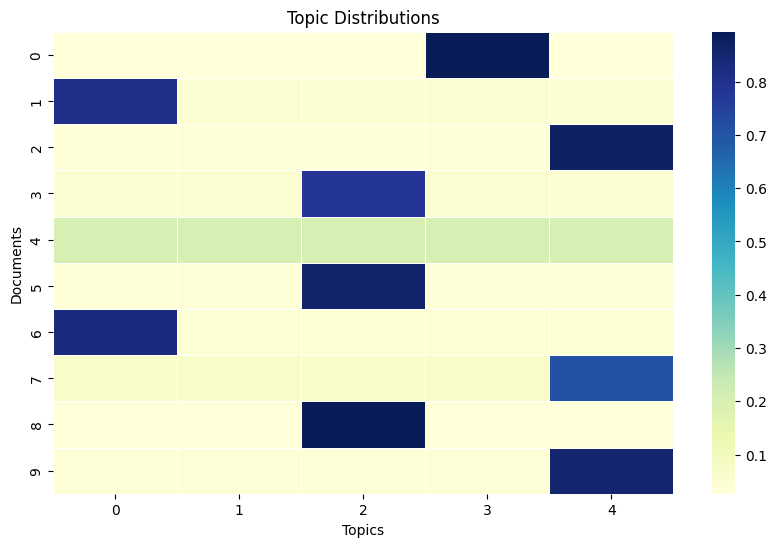

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a heatmap of the topic distributions
plt.figure(figsize=(10, 6))
sns.heatmap(lda_topics, cmap="YlGnBu", linewidths=0.5)
plt.xlabel("Topics")
plt.ylabel("Documents")
plt.title("Topic Distributions")
plt.show()

In [16]:
from sklearn.cluster import KMeans

# Create a K-Means clustering model with 5 clusters
kmeans = KMeans(n_clusters=5)

# Fit the K-Means model to the TF-IDF features of the original comments
kmeans.fit(original_comments_tfidf)

# Predict the cluster labels for the original comments
original_comments_clusters = kmeans.labels_

# Predict the cluster labels for the sub-replies
subreplies_clusters = kmeans.predict(subreplies_tfidf)

# Add the cluster labels to the original dataframe
df['original_comment_cluster'] = original_comments_clusters
df['subreplies_cluster'] = subreplies_clusters

# Print the first few rows of the updated dataframe
print(df.head())

                                    original_comment  \
0  watching market ups down show quickly thing ch...   
1  80k every 4 week good house afford anything al...   
2  explanation clear straight forward always hono...   
3           greatness jimbo thx go bird dallas stink   
4                                                      

                                          subreplies  \
0  [ive looked full name browser found webpage wi...   
1  [huge achieve biweekly return im newbie ive lo...   
2  [dont find mean multiplying income wake one da...   
3                                                 []   
4                                                 []   

   original_comment_cluster  subreplies_cluster  
0                         3                   2  
1                         2                   2  
2                         2                   2  
3                         1                   2  
4                         2                   2  


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [17]:
# Extract the comments for each cluster
for cluster in range(5):
    cluster_comments = df[df['original_comment_cluster'] == cluster]['original_comment']
    print(f"Cluster {cluster}:")
    print(cluster_comments.values)
    print("\n")

Cluster 0:
['like corrupt money'
 'take cramers advise probably dont like money feel need light fire throw ember closest window man following almost comical literally pick worst performing stock zero market foresight doubt im saying simply homework check pick v performance apparently anyone investment advice show need yell act like idiot cramer nail']


Cluster 1:
['greatness jimbo thx go bird dallas stink'
 'buy dip lmao top ticking month people dont seem realize easy sp500 go 50 2 day collapse smci going domino']


Cluster 2:
['80k every 4 week good house afford anything also support family'
 'explanation clear straight forward always honor mentor appreciate time spent educate u financially regardless bad get economy still makeover 28k every single week truly value bianca helpful guide'
 ''
 'love creamer everything pretty much always he bought man he subject big government big business influence']


Cluster 3:
['watching market ups down show quickly thing change strategic informed t

In [18]:
# Concatenate the TF-IDF features of the original comments and sub-replies
from scipy.sparse import hstack

concatenated_features = hstack((original_comments_tfidf, subreplies_tfidf))

# Create a K-Means clustering model with 5 clusters
kmeans = KMeans(n_clusters=5)

# Fit the K-Means model to the concatenated features
kmeans.fit(concatenated_features)

# Predict the cluster labels
cluster_labels = kmeans.labels_

# Add the cluster labels to the original dataframe
df['cluster_label'] = cluster_labels

# Print the first few rows of the updated dataframe
print(df.head())

                                    original_comment  \
0  watching market ups down show quickly thing ch...   
1  80k every 4 week good house afford anything al...   
2  explanation clear straight forward always hono...   
3           greatness jimbo thx go bird dallas stink   
4                                                      

                                          subreplies  \
0  [ive looked full name browser found webpage wi...   
1  [huge achieve biweekly return im newbie ive lo...   
2  [dont find mean multiplying income wake one da...   
3                                                 []   
4                                                 []   

   original_comment_cluster  subreplies_cluster  cluster_label  
0                         3                   2              1  
1                         2                   2              3  
2                         2                   2              2  
3                         1                   2              0  
4

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [19]:
# Get the unique cluster labels
unique_clusters = df['cluster_label'].unique()

# Loop through each cluster
for cluster in unique_clusters:
    # Get the comments for the current cluster
    cluster_comments = df[df['cluster_label'] == cluster][['original_comment', 'subreplies']]
    
    # Print the cluster number and the number of comments in the cluster
    print(f"Cluster {cluster}: {len(cluster_comments)} comments")
    
    # Print the comments for the current cluster
    print(cluster_comments)
    
    # Print a blank line to separate the clusters
    print()

Cluster 1: 1 comments
                                    original_comment  \
0  watching market ups down show quickly thing ch...   

                                          subreplies  
0  [ive looked full name browser found webpage wi...  

Cluster 3: 1 comments
                                    original_comment  \
1  80k every 4 week good house afford anything al...   

                                          subreplies  
1  [huge achieve biweekly return im newbie ive lo...  

Cluster 2: 1 comments
                                    original_comment  \
2  explanation clear straight forward always hono...   

                                          subreplies  
2  [dont find mean multiplying income wake one da...  

Cluster 0: 6 comments
                                    original_comment  \
3           greatness jimbo thx go bird dallas stink   
4                                                      
5  switched roth ira 50 schd 25 schx 25 schg roth...   
7               

In [20]:
# Examine Cluster 0 more closely
cluster0_comments = df[df['cluster_label'] == 0]['original_comment']
print(cluster0_comments)

# Investigate Cluster 3 further
cluster3_comment = df[df['cluster_label'] == 3]['original_comment']
print(cluster3_comment)

3             greatness jimbo thx go bird dallas stink
4                                                     
5    switched roth ira 50 schd 25 schx 25 schg roth...
7                                   like corrupt money
8    take cramers advise probably dont like money f...
9    buy dip lmao top ticking month people dont see...
Name: original_comment, dtype: object
1    80k every 4 week good house afford anything al...
Name: original_comment, dtype: object


In [25]:
# Import necessary libraries
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

# Concatenate the TF-IDF features of the original comments and sub-replies
from scipy.sparse import hstack
concatenated_features = hstack((original_comments_tfidf, subreplies_tfidf))

# Create a DBSCAN model
# dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan = DBSCAN(eps=1.0, min_samples=3)

# Fit the DBSCAN model to the concatenated features
dbscan_labels = dbscan.fit_predict(concatenated_features)

# Create a hierarchical clustering model
# hierarchical = AgglomerativeClustering(n_clusters=5)

# Fit the hierarchical clustering model to the concatenated features
# hierarchical_labels = hierarchical.fit_predict(concatenated_features)

# Add the DBSCAN and hierarchical clustering labels to the dataframe
df['dbscan_label'] = dbscan_labels
# df['hierarchical_label'] = hierarchical_labels

In [26]:
print("Number of clusters:", len(set(df['dbscan_label'])) - 1)

Number of clusters: 1


In [24]:
print(df['dbscan_label'].value_counts())

dbscan_label
-1    10
Name: count, dtype: int64


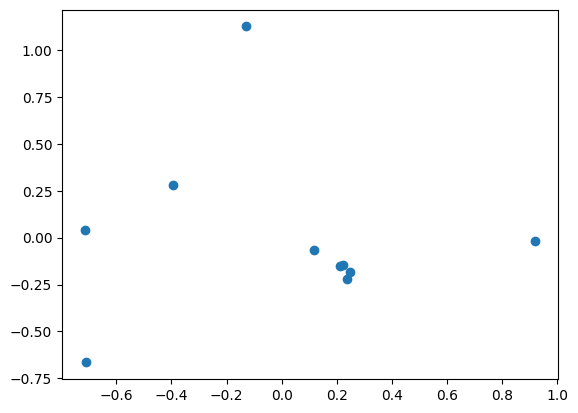

In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(concatenated_features.toarray())

import matplotlib.pyplot as plt
plt.scatter(pca_features[:, 0], pca_features[:, 1])
plt.show()


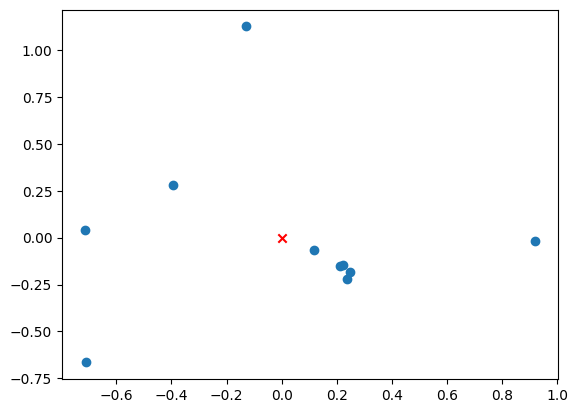

In [29]:
import numpy as np

# Calculate cluster centroid
centroid = pca_features.mean(axis=0)

# Calculate cluster radius
radius = np.linalg.norm(pca_features - centroid, axis=1).max()

# Visualize cluster
plt.scatter(pca_features[:, 0], pca_features[:, 1])
plt.scatter(centroid[0], centroid[1], c='red', marker='x')
plt.show()

In [30]:
# Concatenate TF-IDF features
from scipy.sparse import hstack
concatenated_features = hstack((original_comments_tfidf, subreplies_tfidf))

# Apply DBSCAN clustering
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=10)
dbscan_labels = dbscan.fit_predict(concatenated_features)

# Print the cluster labels
print(dbscan_labels)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


In [37]:
# Experiment with different parameter settings
dbscan = DBSCAN(eps=1.0, min_samples=5)
dbscan_labels = dbscan.fit_predict(concatenated_features)

## Visualize the data using t-SNE
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=5, init="random")  # Set perplexity to 5
reduced_features = tsne.fit_transform(concatenated_features)


(10, 450)
[0.14608382 0.13938894]


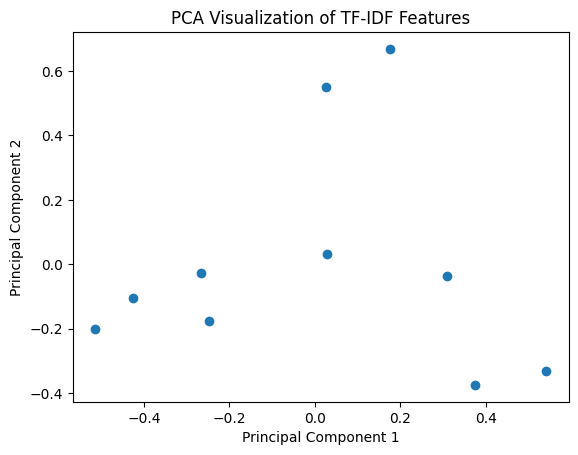

In [42]:
# Combine the original comment and sub-replies into a single text document
df['text_document'] = df.apply(lambda row: row['original_comment'] + ' ' + ' '.join(row['subreplies']), axis=1)

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=5000)

# Fit the vectorizer to the combined text documents and transform them into TF-IDF features
tfidf_features = vectorizer.fit_transform(df['text_document'])

print(tfidf_features.shape)

from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.0, min_samples=5)
dbscan_labels = dbscan.fit_predict(tfidf_features)

# Import PCA from scikit-learn
from sklearn.decomposition import PCA

# Create a PCA object with 2 components
pca = PCA(n_components=2)

# Fit the PCA object to the TF-IDF features and transform them
reduced_features = pca.fit_transform(tfidf_features.toarray())

# Print the explained variance ratio
print(pca.explained_variance_ratio_)

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Create a scatter plot of the reduced features
plt.scatter(reduced_features[:, 0], reduced_features[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization of TF-IDF Features')
plt.show()